<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [21]:
!pip install pandas
!pip install seaborn

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [1]:
# Step 1: Download the dataset
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



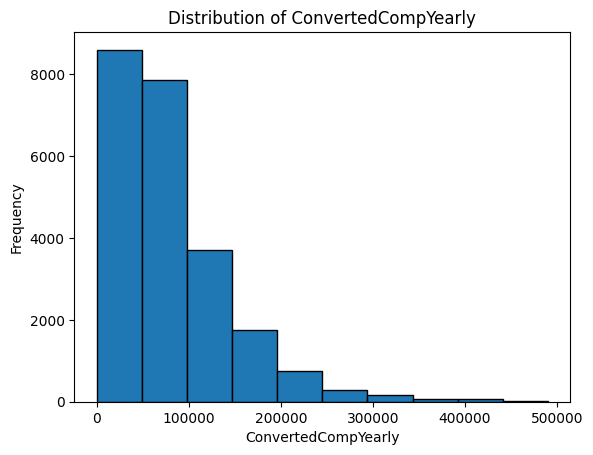

In [2]:
## Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
# Remove rows where 'CompTotal' is NaN after coercion
df_bar=df.dropna(subset=['ConvertedCompYearly']).reset_index(drop=True)

# Filter out extremely large values that might skew the visualization(outliers)
df_bar = df_bar[df_bar['ConvertedCompYearly'] < 500000].copy()

plt.hist(df_bar['ConvertedCompYearly'], bins=10, edgecolor='black')
plt.title('Distribution of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



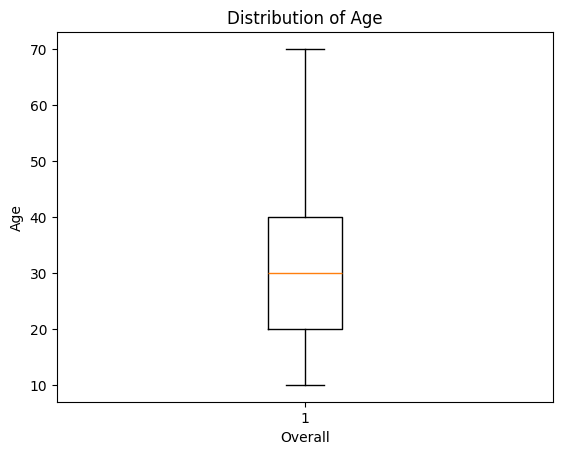

In [3]:
## Write your code here
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_mapping)
plt.boxplot(df['AgeNumeric'].dropna())
plt.title('Distribution of Age')
plt.xlabel('Overall')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



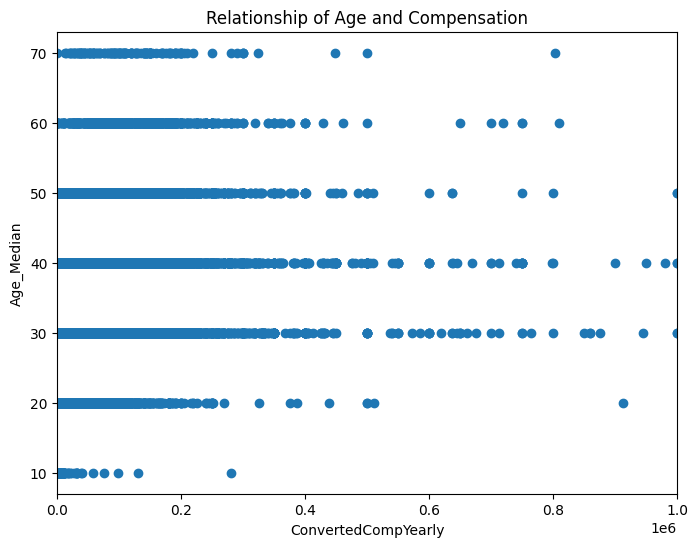

In [4]:
## Write your code here
plt.figure(figsize=(8, 6))
plt.scatter(df['ConvertedCompYearly'], df['AgeNumeric'])
plt.title('Relationship of Age and Compensation')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Age_Median')
plt.xlim(0, 1000000)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


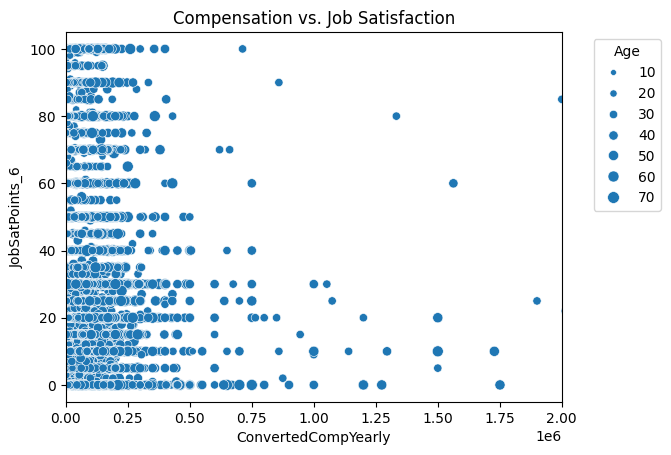

In [5]:
## Write your code here
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', size='AgeNumeric')
plt.title('Compensation vs. Job Satisfaction')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 2000000)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



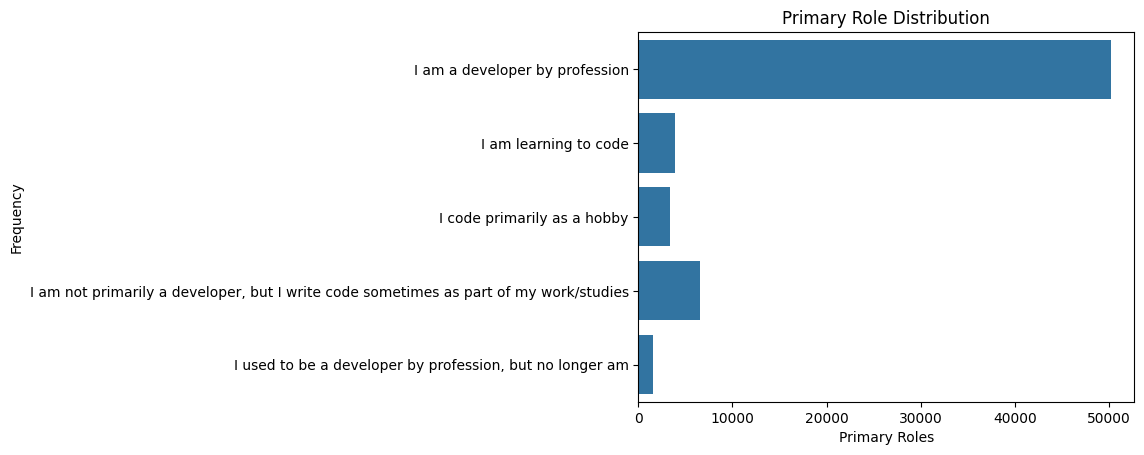

In [6]:
## Write your code here
sns.countplot(data=df, y='MainBranch')
plt.title('Primary Role Distribution')
plt.xlabel('Primary Roles')
plt.ylabel('Frequency')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



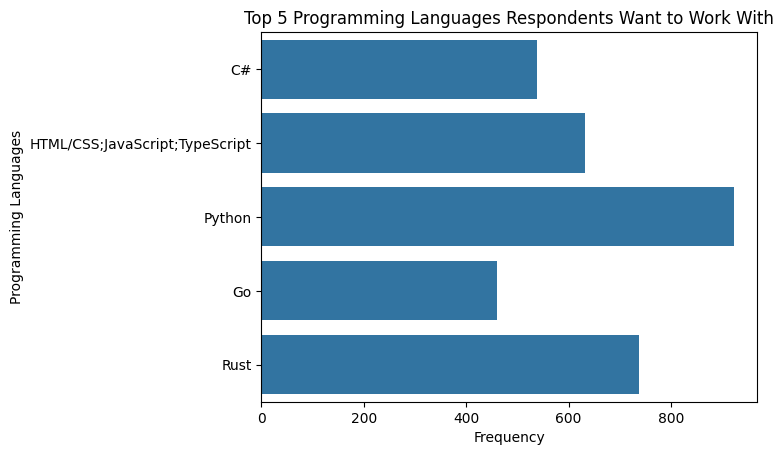

In [7]:
## Write your code here
top5 = df['LanguageWantToWorkWith'].value_counts().nlargest(5).index.tolist()
df_top5 = df[df['LanguageWantToWorkWith'].isin(top5)]

sns.countplot(data=df_top5, y='LanguageWantToWorkWith')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.ylabel('Programming Languages')
plt.xlabel('Frequency')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


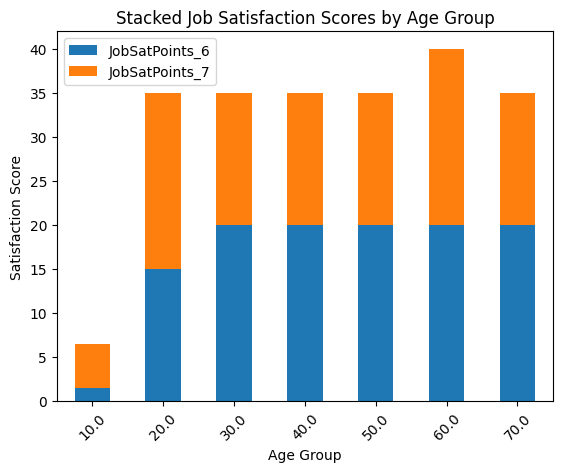

In [8]:
## Write your code here
df_stk = df.groupby('AgeNumeric')[['JobSatPoints_6', 'JobSatPoints_7']].median()
df_stk.plot(kind='bar', stacked=True)
plt.title('Stacked Job Satisfaction Scores by Age Group')
plt.ylabel('Satisfaction Score')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



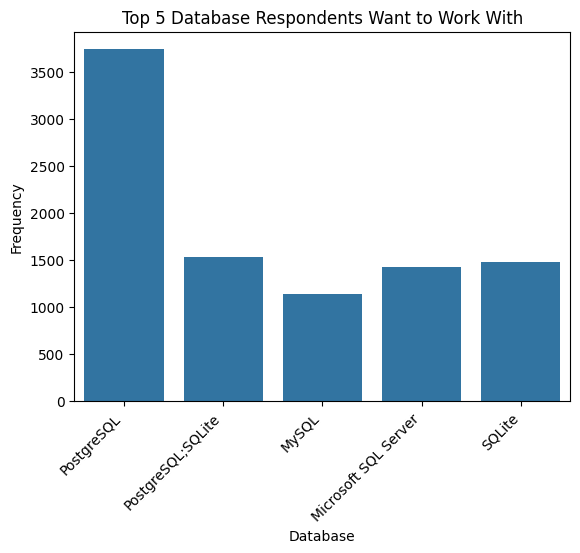

In [9]:
## Write your code here
top5_db = df['DatabaseWantToWorkWith'].value_counts().nlargest(5).index.tolist()
df_top5_db = df[df['DatabaseWantToWorkWith'].isin(top5_db)]

sns.countplot(data=df_top5_db, x='DatabaseWantToWorkWith')
plt.title('Top 5 Database Respondents Want to Work With')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.xticks(rotation=45,ha="right")
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



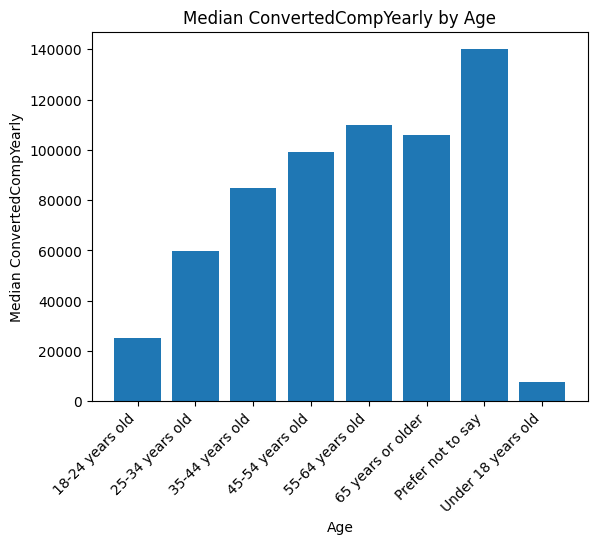

In [10]:
## Write your code here
df_bar = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

plt.bar(df_bar['Age'], df_bar['ConvertedCompYearly'])
plt.title('Median ConvertedCompYearly by Age')
plt.xlabel('Age')
plt.ylabel('Median ConvertedCompYearly')
plt.xticks(rotation=45,ha="right")
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



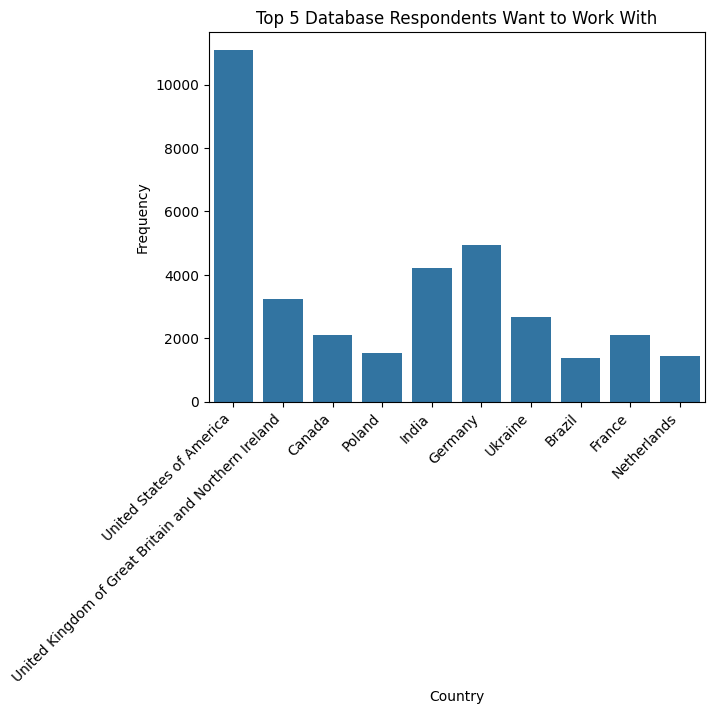

In [11]:
## Write your code here
top10_c = df['Country'].value_counts().nlargest(10).index.tolist()
df_top10_c = df[df['Country'].isin(top10_c)]
sns.countplot(data=df_top10_c, x='Country')
plt.title('Top 5 Database Respondents Want to Work With')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45,ha="right")
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
